<a href="https://colab.research.google.com/github/abhayvr/Regional-sales-Analysis/blob/main/Regional_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

## Problem statement
xyz co's 2014-2018 data to identify key revenue and profit drivers across products,channels, and regions , uncover seasonal trends and outliers , and align performance against budgets.Use there insights to optimise pricing,promotions and market expansion for sustainable growth and reduced concentration risk.

## objective

identify top performing products,channels and region driven revenue and profit

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sheets = pd.read_excel("/content/Regional Sales Dataset.xlsx", sheet_name = None)

In [7]:
# Assign dataframes to each sheet
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_region = sheets['Regions']
df_state_reg = sheets['State Regions']
df_category = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [8]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [9]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [10]:
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [11]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [61]:
df_region.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [13]:
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [14]:
df_category.head()

,State Code,State,Region
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [15]:
df_budgets.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


## Checking for the null values


In [16]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [17]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


df_

In [18]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [19]:
df_region.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [20]:
df_state_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [21]:
df_category.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [22]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


## Data cleaning and Wrangling

In [23]:
# Merging the data of different sheets

In [24]:
# merge with customers
df = df_sales.merge(
    df_customers,
    how = 'left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)


In [25]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [26]:
# merge with products
df = df.merge(
    df_products,
    how = 'left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)

In [27]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [28]:
# merge with regions
df = df.merge(
    df_region,
    how = 'left',
    left_on = 'Delivery Region Index',
    right_on  = 'id'
)

In [29]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [30]:
# merge with state Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how = 'left',
    left_on = 'state_code',
    right_on = 'State Code'
)

In [31]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [32]:
# merge with the budgets
df = df.merge(
    df_budgets,
    how = 'left',
    on = 'Product Name'
)

In [33]:
# customer Index
# Index
# id
# State Code

# clean up redundent columns
cols_to_drop = ['Customer Index','Index','id','State Code']
df = df.drop(columns = cols_to_drop,errors= 'ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [34]:
# convert all the column headings names to lower
df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [35]:
# keep the important columns and delete the columns that we don't need

cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer name index',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [36]:
df = df[cols_to_keep]

In [37]:
df.head()

,ordernumber,orderdate,customer name index,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,126,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,42,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [38]:
# rename the columns
df = df.rename (columns = {
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name' : 'product_name',
    'order quantity' : 'order_quantity',
    'unit price': 'unit_price',
    'line total' : 'revenue',
    'total_unit_cost' : 'cost',
    'state_code' : 'state',
    'state' : 'state_name',
    'latitude': 'lat',
    'longitude' : 'long',
    '2017 budgets' : 'budget'


}
)

In [39]:
# blank out budgets for non-2017 orders

df.loc[df['order_date'].dt.year!= 2017,'budget'] =pd.NA

# line total is revenue
df[['order_date','product_name','revenue','budget']].head()

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_number         64104 non-null  object        
 1   order_date           64104 non-null  datetime64[ns]
 2   customer name index  64104 non-null  int64         
 3   channel              64104 non-null  object        
 4   product_name         64104 non-null  object        
 5   order_quantity       64104 non-null  int64         
 6   unit_price           64104 non-null  float64       
 7   revenue              64104 non-null  float64       
 8   total unit cost      64104 non-null  float64       
 9   state                64104 non-null  object        
 10  county               64104 non-null  object        
 11  state_name           64104 non-null  object        
 12  region               64104 non-null  object        
 13  lat                  64104 non-

In [41]:
## filter all the dataset to include only the records of 2017
df_2017= df[df['order_date'].dt.year==2017]

In [42]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer name index,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
total unit cost,0
state,0


In [43]:
df.isnull().sum()

,0
order_number,0
order_date,0
customer name index,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
total unit cost,0
state,0


In [44]:
df_2017.head()

,order_number,order_date,customer name index,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,long,budget
46363,SO - 0002544,2017-01-01,107,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,116,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,45,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,169,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,20,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


In [45]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15263 entries, 46363 to 61625
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_number         15263 non-null  object        
 1   order_date           15263 non-null  datetime64[ns]
 2   customer name index  15263 non-null  int64         
 3   channel              15263 non-null  object        
 4   product_name         15263 non-null  object        
 5   order_quantity       15263 non-null  int64         
 6   unit_price           15263 non-null  float64       
 7   revenue              15263 non-null  float64       
 8   total unit cost      15263 non-null  float64       
 9   state                15263 non-null  object        
 10  county               15263 non-null  object        
 11  state_name           15263 non-null  object        
 12  region               15263 non-null  object        
 13  lat                  15263 non-n

In [46]:
df_2017.head()

,order_number,order_date,customer name index,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,long,budget
46363,SO - 0002544,2017-01-01,107,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,116,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,45,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,169,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,20,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


## Feature engineering

In [47]:
df.head()

,order_number,order_date,customer name index,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,long,budget
0,SO - 000225,2014-01-01,126,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2014-01-01,96,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2014-01-01,8,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2014-01-01,42,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2014-01-01,73,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [48]:
df['total_cost'] = df['order_quantity'] * df['total unit cost']

In [49]:
df ['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit'] / df['revenue'] * 100

In [50]:
df.head()

,order_number,order_date,customer name index,channel,product_name,order_quantity,unit_price,revenue,total unit cost,state,county,state_name,region,lat,long,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,126,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,96,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,8,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,42,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,73,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


# EDA

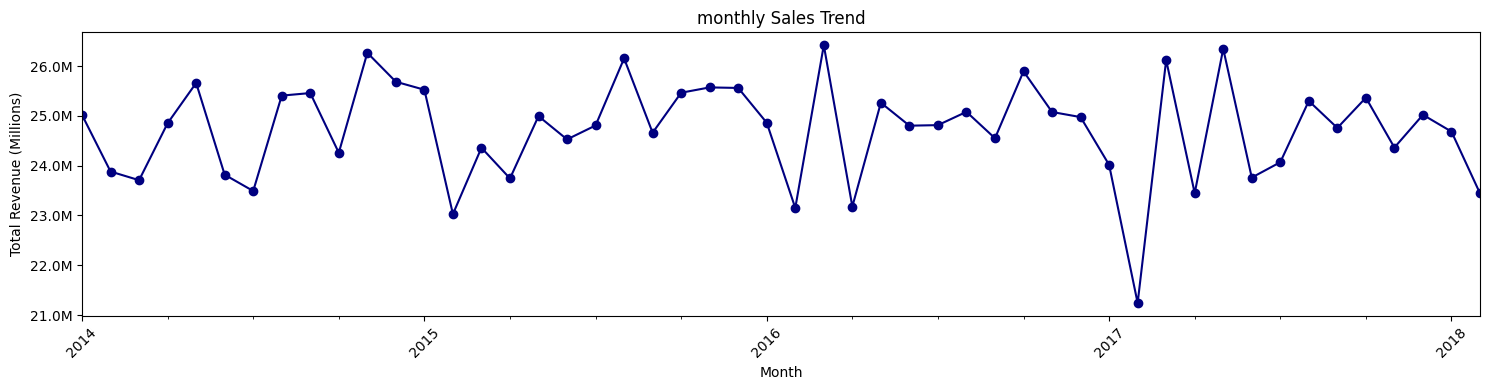

In [51]:
df['order_month'] = df['order_date'].dt.to_period('M')


monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize = (15,4))

monthly_sales.plot(marker = 'o',color = 'navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

In [52]:

# convert order_date to datatime (if not already)
df['order_date'] = pd.to_datetime(df['order_date'])

# remove records from january and february 2018
df_new = df[~((df['order_date'].dt.year ==2018) & (df['order_date'].dt.month.isin([1,2])))]

/tmp/ipython-input-53-3844126730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/tmp/ipython-input-53-3844126730.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


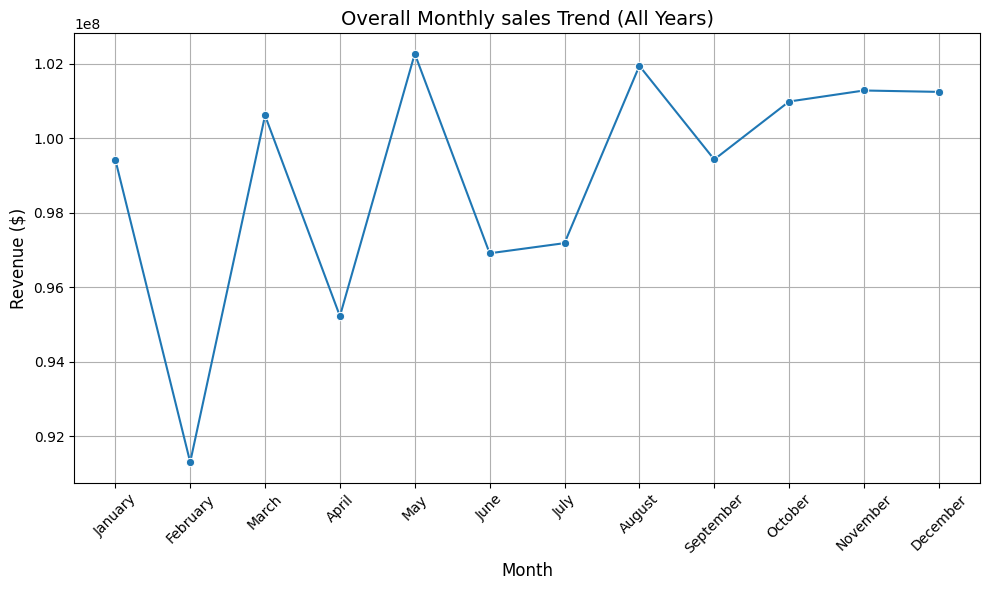

In [53]:

# Convert order_date to datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract month name for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')

# Agregate revenue by month across all years
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()

# sort months in calender order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'month' column
monthly_trend = monthly_trend.sort_values('month')

# create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')

# Set the title and labels
plt.title('Overall Monthly sales Trend (All Years)',fontsize = 14)
plt.xlabel('Month',fontsize = 12)
plt.ylabel('Revenue ($)',fontsize = 12)
plt.xticks(rotation=45)
plt.grid(True)
# Display the chart
plt.tight_layout()
plt.show()

/tmp/ipython-input-54-2394352646.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


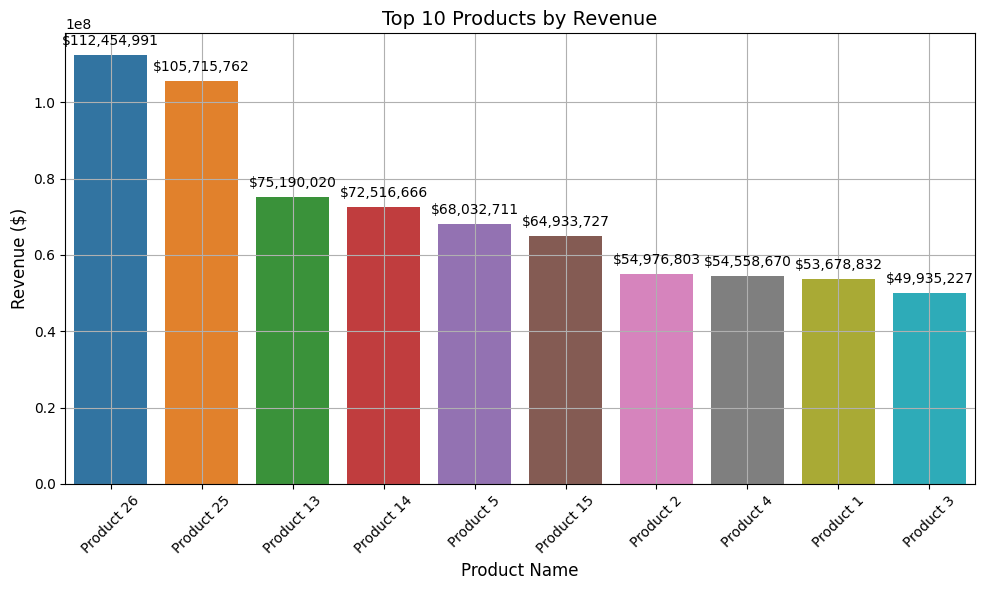

In [54]:
#Aggregate revenue by product_name
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# get the top 10 products by revenue
top_10_products = product_revenue.sort_values(by = 'revenue',ascending = False).head(10)

# create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')

# add labels on the top of each bar
for p in barplot.patches:
  barplot.annotate(f'${p.get_height():,.0f}',
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha = 'center',
                  va = 'center',
                  fontsize = 10,
                  color = 'black',
                  xytext = (0,10),
                  textcoords = 'offset points')


# Set the title and labels
plt.title('Top 10 Products by Revenue',fontsize = 14)
plt.xlabel('Product Name',fontsize = 12)
plt.ylabel('Revenue ($)',fontsize = 12)
plt.xticks(rotation=45)
plt.grid(True)

# Display the chart
plt.tight_layout()
plt.show()

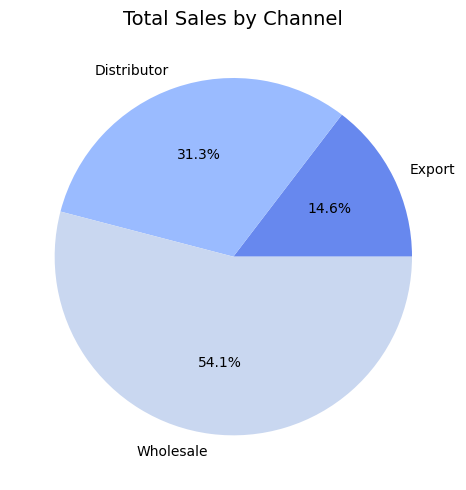

In [55]:
## sales by channel pie chart
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

# create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(chan_sales.values, labels=chan_sales.index, autopct='%1.1f%%',
        colors = sns.color_palette('coolwarm'))

# Set the title
plt.title('Total Sales by Channel',fontsize = 14)

# Display the chart
plt.tight_layout()
plt.show()

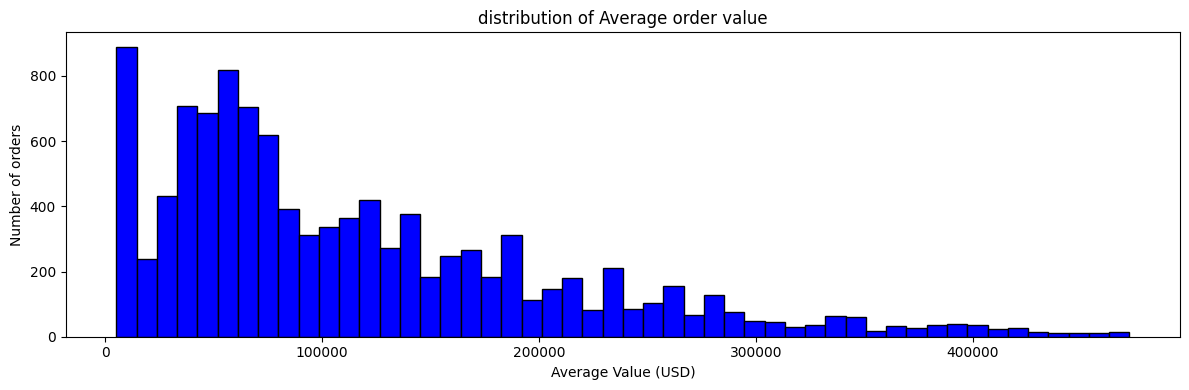

In [56]:
## Average Order value (AOV) Distribution

aov = df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins = 50,
    color = 'blue',
    edgecolor = 'black'
)

plt.title('distribution of Average order value')
plt.xlabel('Average Value (USD)')
plt.ylabel('Number of orders')
plt.tight_layout()
plt.show()


/tmp/ipython-input-58-1764758186.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')


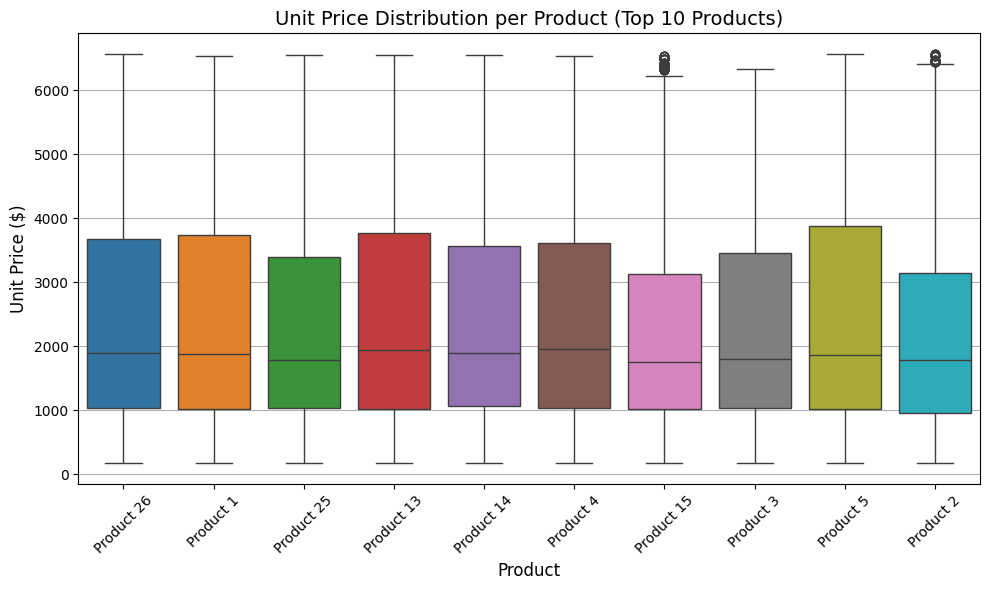

In [58]:
# unit price Distribution per product
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products = product_revenue.sort_values(by = 'revenue',ascending = False).head(10)['product_name'].tolist()

# Filter df to include only top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)]

# create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')
plt.title('Unit Price Distribution per Product (Top 10 Products)',fontsize = 14)
plt.xlabel('Product',fontsize = 12)
plt.ylabel('Unit Price ($)',fontsize = 12)
plt.xticks(rotation=45)
plt.grid(True,axis ='y')
# Display the chart
plt.tight_layout()
plt.show()

/tmp/ipython-input-64-1600440989.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(data=top_10_revenue, x='state_name', y='revenue',palette='tab10',ax=ax1)
/tmp/ipython-input-64-1600440989.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(data=top_10_orders, x='state_name', y='order_count',palette='tab10',ax=ax2)


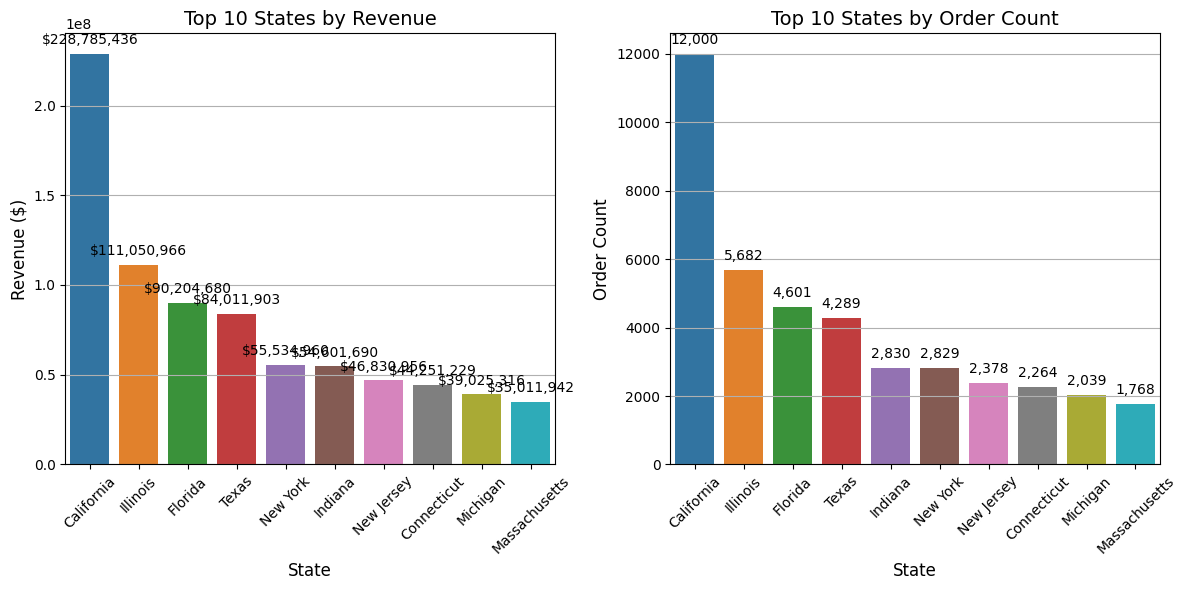

In [64]:
# Top 10 states by revenue and order count
state_status = df.groupby('state_name').agg(revenue = ('revenue','sum'),order_count = ('order_number','count')).reset_index()

# get top 10 states by revenue
top_10_revenue = state_status.sort_values(by = 'revenue',ascending = False).head(10)

# get top 10 states by order count
top_10_orders = state_status.sort_values(by = 'order_count',ascending = False).head(10)

# create subplots for revenue and order count
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,6))

# Bar chart for top 10 states by revenue
barplot1 = sns.barplot(data=top_10_revenue, x='state_name', y='revenue',palette='tab10',ax=ax1)
for p in barplot1.patches:
  barplot1.annotate(f'${p.get_height():,.0f}',
                  (p.get_x() + p.get_width()/2., p.get_height()),
                  ha = 'center',
                  va = 'center',
                  fontsize = 10,
                  color = 'black',
                  xytext = (0,10),
                  textcoords = 'offset points')

ax1.set_title('Top 10 States by Revenue',fontsize = 14)
ax1.set_xlabel('State',fontsize = 12)
ax1.set_ylabel('Revenue ($)',fontsize = 12)
ax1.tick_params(axis='x',rotation=45, labelright=True)
ax1.grid(True,axis = 'y')

# Bar chart for top 10 states by order count
barplot2 = sns.barplot(data=top_10_orders, x='state_name', y='order_count',palette='tab10',ax=ax2)
for p in barplot2.patches:
  barplot2.annotate(f'{p.get_height():,.0f}',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha = 'center',
                    va = 'center',
                    fontsize = 10,
                    color = 'black',
                    xytext = (0,10),
                    textcoords = 'offset points')
  ax2.set_title('Top 10 States by Order Count',fontsize = 14)
  ax2.set_xlabel('State',fontsize = 12)
  ax2.set_ylabel('Order Count',fontsize = 12)
  ax2.tick_params(axis='x',rotation=45, labelright=True)
  ax2.grid(True,axis = 'y')

# Display the chart
plt.tight_layout()
plt.show()

In [68]:
df.columns

Index(['order_number', 'order_date', 'customer name index', 'channel',
       'product_name', 'order_quantity', 'unit_price', 'revenue',
       'total unit cost', 'state', 'county', 'state_name', 'region', 'lat',
       'long', 'budget', 'total_cost', 'profit', 'profit_margin_pct',
       'order_month'],
      dtype='object')

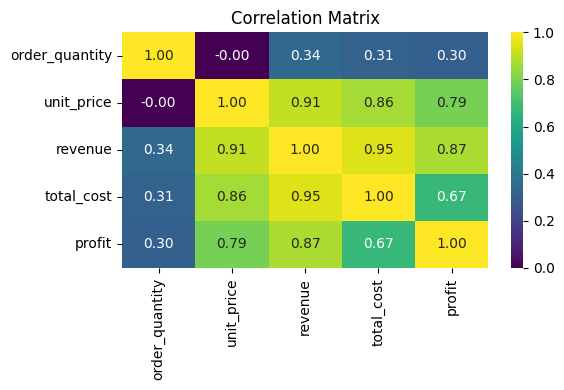

In [69]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity','unit_price','revenue','total_cost','profit']

# calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# set the figure siae for clarity
plt.figure (figsize =(6,4))

# plot the heatmap with annotations and a virdis colormap
sns.heatmap(
    corr,
    annot = True,
    fmt=".2f",
    cmap='viridis'
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [ ]:
# Channel Distribution ; 54% wholesale, 31% Distribution , 15 %exports